In [2]:
pip install pandas numpy scikit-learn matplotlib seaborn


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Square_Footage  8 non-null      int64
 1   Bedrooms        8 non-null      int64
 2   Bathrooms       8 non-null      int64
 3   Price           8 non-null      int64
dtypes: int64(4)
memory usage: 388.0 bytes
None
       Square_Footage  Bedrooms  Bathrooms          Price
count        8.000000  8.000000   8.000000       8.000000
mean      2437.500000  4.000000   3.000000  365000.000000
std        992.741514  1.309307   1.309307  138667.124541
min       1200.000000  2.000000   1.000000  200000.000000
25%       1725.000000  3.000000   2.000000  265000.000000
50%       2250.000000  4.000000   3.000000  325000.000000
75%       3125.000000  5.000000   4.000000  462500.000000
max       4000.000000  6.000000   5.000000  600000.000000


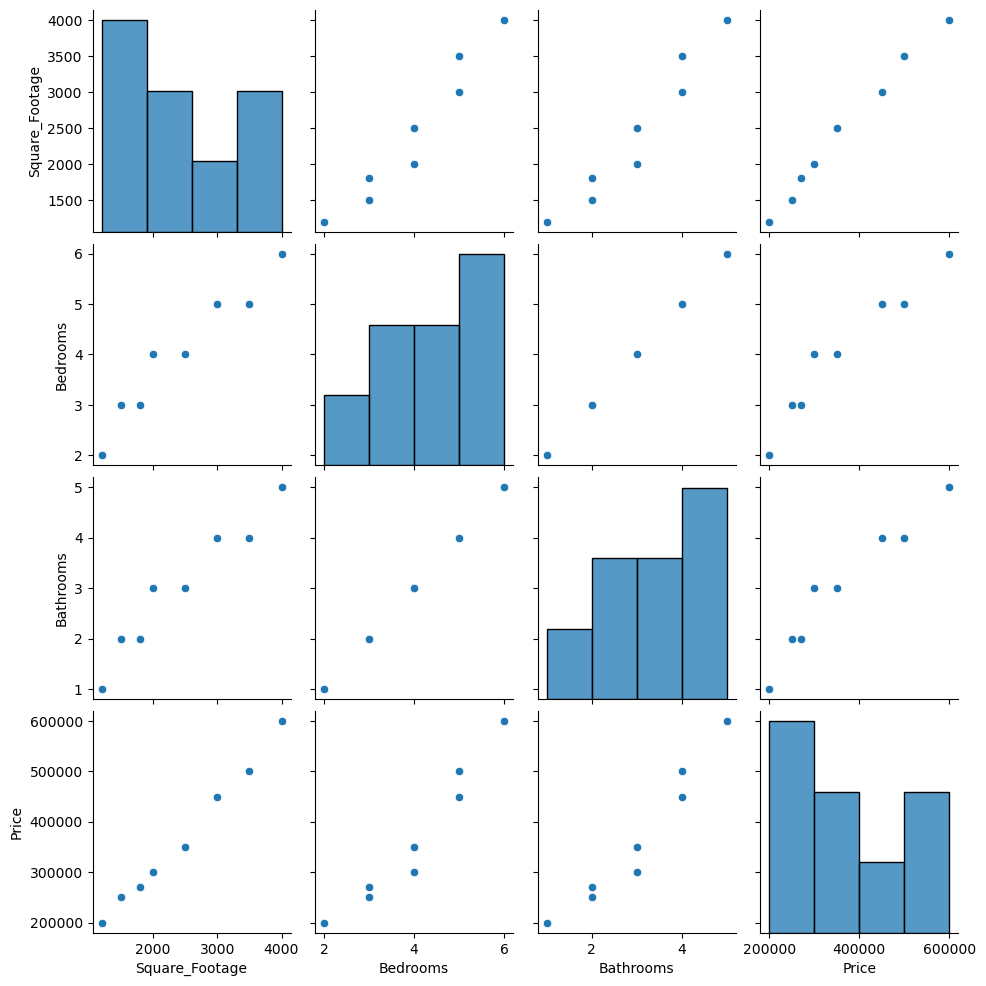

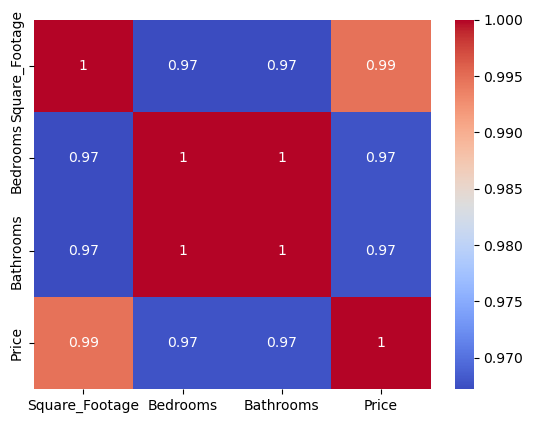

Coefficients: [139.88603989 441.5954416  441.5954416 ]
Intercept: 17193.732193732343
   Actual      Predicted
1  250000  229230.769231
5  450000  440826.210826
Mean Squared Error: 257759677.27534497
R-squared: 0.9742240322724655


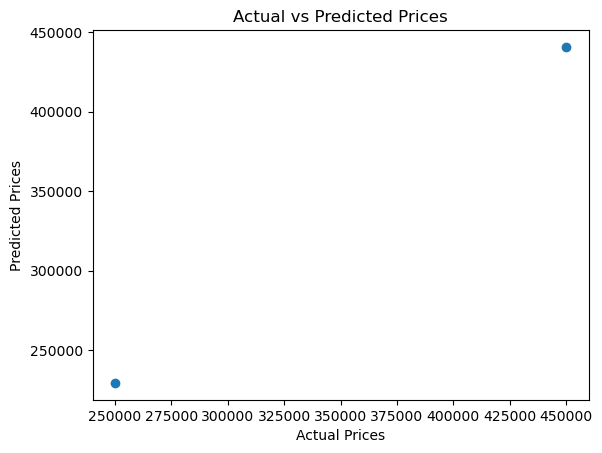

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Create a dataset
data = {
    'Square_Footage': [1200, 1500, 1800, 2000, 2500, 3000, 3500, 4000],
    'Bedrooms': [2, 3, 3, 4, 4, 5, 5, 6],
    'Bathrooms': [1, 2, 2, 3, 3, 4, 4, 5],
    'Price': [200000, 250000, 270000, 300000, 350000, 450000, 500000, 600000]
}
df = pd.DataFrame(data)

# Step 2: Explore the data
print(df.info())
print(df.describe())
sns.pairplot(df)
plt.show()
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

# Step 3: Prepare data
X = df[['Square_Footage', 'Bedrooms', 'Bathrooms']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the model
model = LinearRegression()
model.fit(X_train, y_train)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Step 5: Predict
y_pred = model.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

# Step 6: Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Step 7: Visualize
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

